## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
#by using the method read_csv which reads the csv files

df= pd.read_csv('ab_data.csv')
#head(x) method to see the first x rows in the dataset
df.head(5)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [3]:
#shape method to find number of rows[0] or number of columns[1]
df.shape[0] #294478

294478

c. The number of unique users in the dataset.

In [4]:
# nunique method to find the number of unique x in dataset
#This will return the number of unique users in user_id column
df.user_id.nunique() #290584


290584

d. The proportion of users converted.

In [5]:
#len method return the number of rows and divide it with the number of rows in--
# all dataframe to get the propotion of converted users.
len(df[(df['converted']== 1)]) / len(df) # ~~ 12%

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't match.

In [6]:
# using query method to extract the number of rows that match the required question above

no_match= df.query('(landing_page != "new_page" and group == "treatment") or (group != "treatment" and landing_page == "new_page")')['user_id']

#now using the shape method to return the number of rows in no_match query result
no_match.shape[0] #3893

3893

f. Do any of the rows have missing values?

In [7]:
#isnull method to check any missing values

#option1
df.isnull().sum().sum() # will return 0 which indicates that the number of rows
#that has null values is 0

#option2
#df.isnull().sum().any()
# will return False which indicates that the number of rows that has null values is 0

0

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
#using the query method to find rows that doesn't matches
df2 = df.query(' landing_page=="new_page" & group=="treatment" | group=="control" & landing_page=="old_page"')

#using the method nunique to find the number of unique rows
df2['user_id'].nunique()

290584

In [9]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [10]:
#using the method nunique to find the number of unique rows
df2['user_id'].nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [11]:
#by using the method duplicated to detect any duplicate row
df2[df2['user_id'].duplicated()] # row number 2893 with 773192 user_id

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [12]:
df2[df2['user_id'].duplicated()]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [13]:
#by using method drop to remove any row from the dataset
df2 = df2.drop(df2.index[2893],axis=0)

#check incase something went wrong ##output should be 0
sum(df2.duplicated())

0

`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [14]:
len(df2[(df2['converted']== 1)]) / len(df2)

#it would be 0.11959

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [15]:
#divide the number of converted 'control' group by the number of all 'control' group
len(df2.query('group == "control" and converted == 1')) / len(df2.query('group == "control"'))

#it would be 0.12038

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [16]:
#divide the number of converted 'treatment' group by the number of all 'treatment' group
len(df2.query('group == "treatment" and converted == 1')) / len(df2.query('group == "treatment"'))

#it would be 0.1188

0.11880806551510564

d. What is the probability that an individual received the new page?

In [17]:
#divide the number of users who recieved the new page by the number of all users
len(df2.query('landing_page == "new_page"')) / len(df2)

#it would be 0.5001

0.5000619442226688

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

**Given that converted rate of the "control" group is 12.03% ~12% and the converted rate of the "treatment" group is  11.88% ~11.9%, there is no evidence that the new treatment page leads to more conversion rate since that the conversion rate for both group "treatment" and "control" are nearly the same.**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**$$H_{0}:p_{old} \geq  p_{new}$$                                                
$$H_{1}:p_{old} < p_{new}$$**

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [18]:
#divide the number of converted user by the number of all user to 
#get the conversion rate
conv_new = len(df2.query( 'converted==1'))/len(df2)
conv_new

0.11959708724499628

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [19]:
#p_old is same as p_new hence it's regradless of the page
conv_old = conv_new
conv_new

0.11959708724499628

c. What is $n_{new}$, the number of individuals in the treatment group?

In [20]:
#by using query method to get all treatment users in df
treat_num = len(df2.query('group == "treatment"'))
treat_num

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [21]:
#by using query method to get all treatment users in df
ctrl_num = df2.query('group == "control"').shape[0]
ctrl_num

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [22]:
#by using method random.choice
new_page_converted = np.random.choice(2, treat_num, replace = True, p=[(1-conv_new), conv_new])
new_page_converted

array([0, 0, 0, ..., 0, 0, 0])

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [23]:
old_page_converted = np.random.choice(2, ctrl_num, replace = True, p=[(1-conv_old), conv_old])
old_page_converted

array([0, 0, 0, ..., 1, 0, 0])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [24]:
the_diff = (new_page_converted.mean() - old_page_converted.mean())
the_diff

0.00132637279854049

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [25]:
p_diffs =[]
#the fisrt parameter in random.choice method is the sample 0,1 (2 is excluded)
#second paramter is the size, 
#third paramter is the replace (by default is true) which allows you
#to choose from the sample multiple times
#last paramter is the probabilites for your sample, it follows the order of your
#sample, first probs goes to the first samlpe element
for x in range(10000):
    new_conv = np.random.choice(2, size = treat_num, replace = True, p=[(1-conv_new),conv_new])
    old_conv = np.random.choice(2, size = ctrl_num, replace = True, p=[(1-conv_old),conv_old])
    p_diffs.append(new_conv.mean() - old_conv.mean())

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

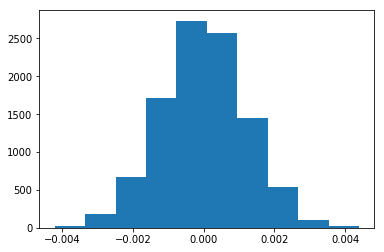

In [26]:
#convert it to array to plot the histogram
p_diffs= np.array(p_diffs)
plt.hist(p_diffs);

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [27]:
#first calcualte the actual difference in ab_data
actual_difference = df2.query('group == "treatment"').converted.mean() \
- df2.query('group =="control"').converted.mean()

#how to calculate the p-value:-
(p_diffs > actual_difference).mean()
#answer can be a little different because it relys on random variables
#answer is 90.2% of the porpotion is greater than the actual difference

0.90310000000000001

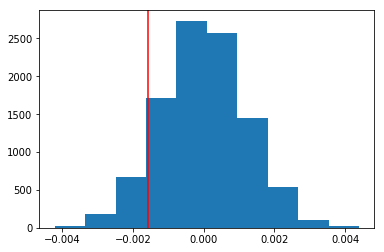

In [28]:
plt.hist(p_diffs);
plt.axvline(actual_difference, color="r");

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

- **"p_diffs" represent the difference between convered in old and new page in 10,000 simulated sample using random choice method.** <br/>**And "acutal difference" represent the acutal difference between converted in old and new page based our dataset "ab_data".**<br/>
- **What we computed in j was the p-value, and since that large p-value always suggest to stick with the null hypothesis, with our p-value being 0.902 it suggest us to stick with null hypothesis so we fail to reject the nul hypothesis.**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [29]:
import statsmodels.api as sm


convert_old = len(df2.query('group =="control" and converted == 1'))
convert_new = len(df2.query('group == "treatment" and converted == 1'))
n_old = len(df2.query('group == "control"'))
n_new = len(df2.query('group == "treatment"'))

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [30]:
sm.stats.proportions_ztest([convert_new,convert_old], [n_new, n_old], alternative='larger')

(-1.3109241984234394, 0.90505831275902449)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

- **The z-score is -1.3109 and the p-value is 0.905 .**
<br/>
- **Since the p-value here is large, it suggest to stick to our null hypothesis and therefore we fail to reject the null hypothsis.**
<br/>
- **Yes, they do agree with the findings in part j and k.**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**We should use the <u>logistic regression</u> hence the response variable is binary or cateogrical variable where as in linear model the response variable is quantitative variable .**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [31]:
#First is importing staatsmodels
import statsmodels.api as sm

#Adding the intecept column to df2
df2['intercept']=1
#Using get_dummies method prom pandas library to convert categorical variables
# "drop_first" Whether to get k-1 dummies out of k categorical levels by removing the first level..
#If true it will remove the fisrt one
df2['ab_page'] = pd.get_dummies(df2['group'],drop_first=True)
df2[['ab_page','group']].head(5)
df2.head()
#As we can see the control is 0 and treatment is 1 

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [32]:
#by using method Logit to fit linear model for categorial response variable
#if your response variable is quantitative, you should use
#OLS(ordinary least squares) method

logit_model = sm.Logit(df2['converted'],df2[['intercept','ab_page']])
results = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [33]:
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-08-23 16:17 AIC:              212780.3502
No. Observations:   290584           BIC:              212801.5095
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

In [34]:
1/np.exp(-0.0150)

1.0151130646157189

#### Interpreting Result from summary above:

For every unit for ab_page decrease, convert will be 1.5% more likely to happen, holding all other varible constant.

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

- **The p-value associated with ab_page in part III is 0.1899 ~0.19, where as in part II is 0.902 .**
<br/>
- **The null and alternative hypotheses in in part III is <br/>null  =   P_new - P_old = 0 <br/> alt = p_old - p_new != 0** 


f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

- **The current regression is based only on one variable which is the type of page, adding more factors should leed us is more accurate regression.** <br/>
- **In general, adding new factor is good in making prediction or regression, but could also leed to multicollinearity which mean that our explanatory variables (x-variables) are correlated to each other.**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [46]:
country_df= pd.read_csv('countries.csv')
country_df.head(2)

,user_id,country
0,834778,UK
1,928468,US


In [47]:
merged_df = df2.merge(country_df,how='inner', on='user_id')
merged_df.head(2)

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US


In [48]:
#first check the number or unique values in country before convert it as dummy variables
merged_df.country.unique()
#there is three unique values in country which means we have to convert to 2 dummy variables

array(['US', 'CA', 'UK'], dtype=object)

In [50]:
#Now convert it to dummy variables
merged_df[['CA', 'US', 'UK']] = pd.get_dummies(merged_df['country'])

In [51]:
#now fit the logistic model 
logit_model2 = sm.Logit(merged_df['converted'],merged_df[['intercept','CA','UK','ab_page']])
results2 = logit_model2.fit()
results2.summary2()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-08-23 16:22 AIC:              212781.1253
No. Observations:   290584           BIC:              212823.4439
Df Model:           3                Log-Likelihood:   -1.0639e+05
Df Residuals:       290580           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9794    0.0127  -155.4145  0.0000  -2.0044  -1.9544
CA           -0.0506    0.0284    -1.7835  0.0745  -0.1063   0.0050
UK           -0.0099    0.0133    -0.7433  0.4573  -0.0359   0.0162
ab_page      -0.0149    0.0114    -1.3069  0.1912  -0.0374   0.0075
==================================================================

"""

In [40]:
#first exponentiate the coef
np.exp(results2.params)

intercept    0.138154
CA           0.950621
UK           0.990165
ab_page      0.985168
dtype: float64

In [41]:
#Since all of it is less than one in the above cell, we should obtain the reciprocal for it
1/np.exp(results2.params)

intercept    7.238314
CA           1.051944
UK           1.009932
ab_page      1.015056
dtype: float64

#### Interpreting the Result from the summary above:

- For every unit for CA decrease, convert will be 5.19% more likely to happen, holding all other varible constant.

- For every unit for UK decreases, convert is 0.99% more to happen, holding all other varible constant.

- For every unit for ab_page decreases, convert is 1.50% more to happen, holding all other varible constant.

- g)<br/> **The p-value for countries in the summary above indicates that the countries UK-CA-US are not statistically significant.** <br/> **meaning that the country of origin does not impact conversion rate**

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [52]:
#First create the interaction column between page and country.
merged_df['CA_ab_page'] = merged_df['CA'] * merged_df['ab_page']

In [55]:
logit_model3 = sm.Logit(merged_df['converted'],merged_df[['intercept','CA','UK','ab_page','CA_ab_page']])
results3 = logit_model3.fit()
results3.summary2()

Optimization terminated successfully.
         Current function value: 0.366111
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-08-23 16:29 AIC:              212782.0543
No. Observations:   290584           BIC:              212834.9526
Df Model:           4                Log-Likelihood:   -1.0639e+05
Df Residuals:       290579           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9807    0.0128  -154.7105  0.0000  -2.0058  -1.9556
CA           -0.0233    0.0386    -0.6033  0.5463  -0.0990   0.0524
UK           -0.0099    0.0133    -0.7438  0.4570  -0.0359   0.0162
ab_page      -0.0123    0.0117    -1.0474  0.2949  -0.0352   0.0107
CA_ab_page   -0.0552    0.0533    -1.0348  0.3008  -0.1597   0.0493
==================================================================

"""

- h)**The p-value for CA_ab_page in the summary above indicates that the inteaction between page and country is not statistically significant.** <br/> **Therefore, we fail to reject the null hypothesis.**

### Conclusion: -
##### As we saw in the analysis above, there no evidence that the new page much more conversion rate than the old page, therefore we fail rejcet the null hypothesis and company should keep the old page.

<a id='conclusions'></a>
## Finishing Up

> Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [42]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0